In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species']) # converting species name to unique number 

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df[['sepal_length','petal_length','species']] # using numpy fancy indexing reducing no of columns 

In [8]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [9]:
X= df.iloc[:,0:2]
y= df.iloc[:,-1] # predicting the type of species flowe belong based on their sepal length and petal length 

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [11]:
clf = LogisticRegression(multi_class='multinomial') # softmax Regression 

In [12]:
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [12]:
print(accuracy_score(y_test,clf.predict(X_test)))

0.9666666666666667


In [14]:
pd.DataFrame(confusion_matrix(y_test,clf.predict(X_test)))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [15]:
# prediction
query= np.array([[3.4,2.7]])
clf.predict_proba(query) # getting probablity of each species the species with maximum probablity is the type of the flower

/home/swapnil/Desktop/sample_project_1/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[7.25957888e-01, 2.73627865e-01, 4.14246954e-04]])

In [16]:
# setosa is the class of flower 
# array([0])

In [17]:
clf.predict(query)

/home/swapnil/Desktop/sample_project_1/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

## plotting the classification lines 

/home/swapnil/Desktop/sample_project_1/env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


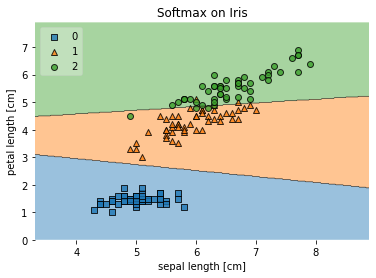

In [21]:

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()